In [47]:
%pylab inline
import scipy
import os
import numpy as np
from scipy import misc
from scipy import ndimage
from skimage import feature
from skimage.transform import (hough_line, hough_line_peaks,probabilistic_hough_line)
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import peak_local_max
from skimage.draw import circle_perimeter

import cv2

#-----------------------

output_dir = os.path.join('.')

Populating the interactive namespace from numpy and matplotlib


<h3><div style="text-align: right"> Diego Rodriguez - 201425220 </div></h3>

<h1><center> Prueba con otra foto </center></h1>

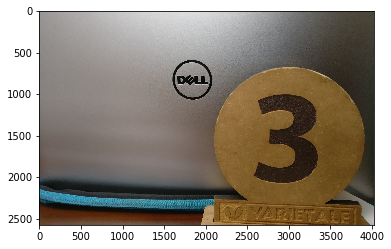

In [57]:
# Importar la imagen con OpenCV
ves = cv2.imread('test_pic.jpg',0) # Importarla en grayscale para poder aplicar Canny
ves_color = cv2.cvtColor(cv2.imread('test_pic.jpg'), cv2.COLOR_BGR2RGB)

plt.imshow(ves_color)

In [33]:
sobelx = cv2.Sobel(ves,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(ves,cv2.CV_64F,0,1,ksize=5)

laplacian = cv2.Laplacian(ves, cv2.CV_64F)

test = cv2.Canny(ves,100,101)

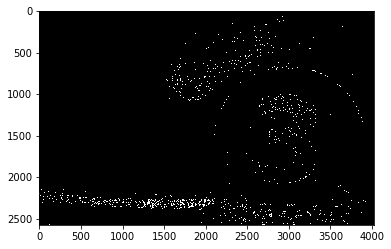

In [34]:
plt.imshow(test, cmap='gray')

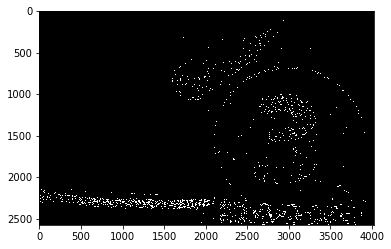

In [35]:
# Aplicar el filtro Canny del scipy toolkit skimage - funciona más fácil que el de OpenCV 
edges_ves = feature.canny(ves, sigma=1)
plt.imshow(edges_ves, cmap='gray')

In [36]:
# Definir una función que intenta detectar los límites superiores e inferiores 
# para aplicar el filtro Canny de OpenCV

def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
 
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
 
    # return the edged image
    return edged

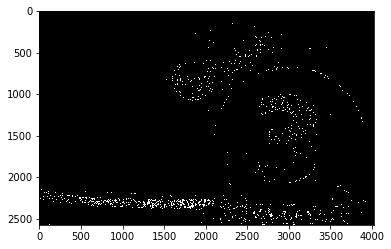

In [37]:
# Aplicar la función de auto_canny a la imagen
prueba = auto_canny(ves)
plt.imshow(prueba,cmap="gray")

In [38]:
# Aplicar la transformada de Hough Circular para detectar los círculos en la imagen

# Crear un arreglo con estimaciones de los radios para que la función de hough_circle de skimage los use
# Entre más pasos haya en el vector de predicción, más preciso puede ser el Hough Transform

hough_radii = np.arange(0, 1050, 50)  
hough_res = hough_circle(edges_ves, hough_radii)

In [39]:
# Identificar los círculos más prominentes con centros separados por cierta distancia (1 por default)
# Se puede espicifcar cuantos círculos prominentes detectar - en este caso sólo se quiere 1
# http://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.hough_circle_peaks
# Accums = peak values, cx = x coordinate for center, cy = y coordinate for center, radii = radii of circles

accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=1)

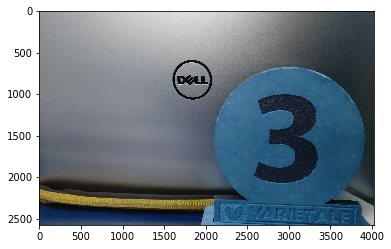

In [40]:
# Crear una copia de la imagen para no dañar la original
output = ves_color.copy()

# Plot la original
#plt.subplot(121)
#plt.imshow(ves_color)

# Pintar el círculo y el centro sobre la copia de la imagen
for x in cx:
    for y in cy:
        for r in radii: 
            cv2.circle(output, (x,y), r, (0,255,0),5)
            cv2.circle(output, (x,y), 1, (255,0,0),20)

# Plot la nueva imagen
#plt.subplot(122)            
plt.imshow(output)

In [41]:
print("Centro = ({},{}) pixeles".format(cx[0],cy[0]))
print("Radio = {} pixeles".format(radii[0]))

Centro = (3310,2569) pixeles
Radio = 0 pixeles


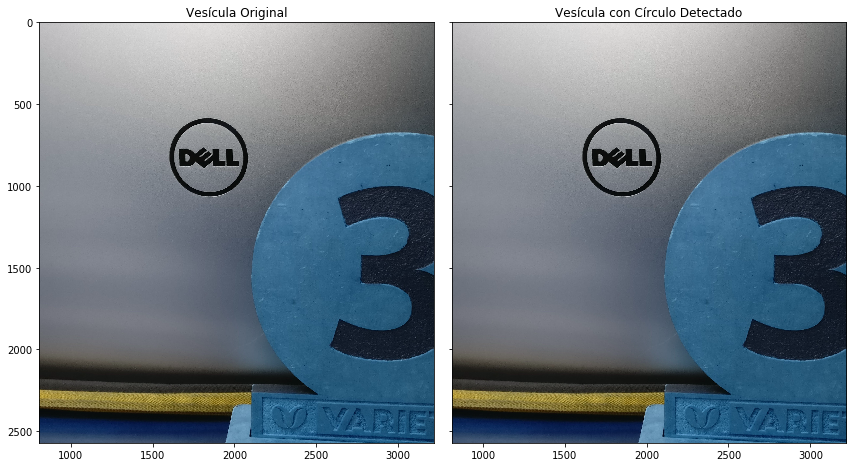

In [42]:
#f, ax = plt.subplots(1, 2, figsize=(5, 2.9), sharey=True)
f, ax = plt.subplots(1, 2, figsize=(12, 6.6), sharey=True)

ax[0].imshow(ves_color)
ax[0].set_title('Vesícula Original')

ax[1].imshow(output)
ax[1].set_title('Vesícula con Círculo Detectado')

plt.tight_layout()

#pylab.savefig(os.path.join(output_dir,'output.png'), dpi=600)